# Overview

This notebook plots the main simulation figures for the CPI-DNN paper

- _Figure 1_: High-level comparison of CPI and Perfmit
- _Figure 2_: Effect of sample size
- _Figure 3_: Extensive generative model benchmark, inclduding state of the art.
- _Figure 4_: Application example

In [1]:
import pathlib
import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
def ymin(x):    return np.quantile(x, 0.25)
def ymax(x):    return np.quantile(x, 0.75)

## Figure 1

In [2]:
res_path = pathlib.Path('../results/results_csv')
list(res_path.glob('*grps*.csv'))

[PosixPath('../results/results_csv/power_blocks_100_grps.csv'),
 PosixPath('../results/results_csv/AUC_blocks_100_grps.csv'),
 PosixPath('../results/results_csv/time_bars_blocks_100_grps.csv'),
 PosixPath('../results/results_csv/simulation_results_blocks_100_grps.csv'),
 PosixPath('../results/results_csv/type1error_blocks_100_grps.csv')]

In [3]:
df_auc = pd.read_csv(res_path / 'AUC_blocks_100_grps.csv')
df_auc['group_stack'] = df_auc['group_stack'].map({True: 'Stacking', False: 'No Stacking'})
df_auc_1 = df_auc[df_auc['method'].isin(['Permfit-DNN', 'CPI-DNN', 'CPI-RF', 'Marg'])]
df_auc_1['method'] = df_auc_1['method'].map({'Permfit-DNN': 'BPI-DNN',
                                             'CPI-DNN': 'BCPI-DNN',
                                             'CPI-RF': 'BCPI-RF',
                                             'Marg': 'Marginal'})
df_auc_2 = df_auc[(df_auc['method'].isin(['gopfi', 'gpfi'])) & (df_auc['group_stack'] == 'No Stacking')]
df_auc_2['method'] = df_auc_2['method'].map({'gopfi': 'GOPFI', 'gpfi': 'GPFI'})
df_auc_3 = df_auc[(df_auc['method'].isin(['dgi', 'goi'])) & (df_auc['group_stack'] == 'No Stacking')]
df_auc_3['method'] = df_auc_3['method'].map({'dgi': 'LOGO', 'goi': 'LOGI'})
df_auc = pd.concat([df_auc_1, df_auc_2, df_auc_3], axis=0)

df_t1_error = pd.read_csv(res_path / 'type1error_blocks_100_grps.csv')
df_t1_error['group_stack'] = df_t1_error['group_stack'].map({True: 'Stacking', False: 'No Stacking'})
df_t1_error['method'] = df_t1_error['method'].map({'Permfit-DNN': 'BPI-DNN',
                                                   'CPI-DNN': 'BCPI-DNN',
                                                   'CPI-RF': 'BCPI-RF',
                                                   'Marg': 'Marginal'})

df_power = pd.read_csv(res_path / 'power_blocks_100_grps.csv')
df_power['group_stack'] = df_power['group_stack'].map({True: 'Stacking', False: 'No Stacking'})
df_power['method'] = df_power['method'].map({'Permfit-DNN': 'BPI-DNN',
                                             'CPI-DNN': 'BCPI-DNN',
                                             'CPI-RF': 'BCPI-RF',
                                             'Marg': 'Marginal'})

df_time = pd.read_csv(res_path / 'time_bars_blocks_100_grps.csv')
df_time['group_stack'] = df_time['group_stack'].map({True: 'Stacking', False: 'No Stacking'})
df_time['method'] = df_time['method'].map({'Permfit-DNN': 'BPI-DNN',
                                             'CPI-DNN': 'BCPI-DNN',
                                             'CPI-RF': 'BCPI-RF',
                                             'Marg': 'Marginal',
                                             'gopfi': 'GOPFI',
                                             'gpfi': 'GPFI',
                                             'dgi': 'LOGO',
                                             'goi': 'LOGI'})


/tmp/ipykernel_6081/2044782444.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_auc_1['method'] = df_auc_1['method'].map({'Permfit-DNN': 'BPI-DNN',
/tmp/ipykernel_6081/2044782444.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_auc_2['method'] = df_auc_2['method'].map({'gopfi': 'GOPFI', 'gpfi': 'GPFI'})
/tmp/ipykernel_6081/2044782444.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [4]:
methods = ['BCPI-DNN', 'BPI-DNN', 'BCPI-RF', 'Marginal', 'LOGO', 'LOGI', 'GOPFI', 'GPFI']
scenarios = [0.0, 0.2, 0.5, 0.8]

In [5]:
# AUC

df_auc_agg = df_auc.groupby(['method', 'correlation_group', 'group_stack'])['V1'].agg([np.mean, ymin, ymax]).reset_index()
df_auc_1_agg = df_auc_1.groupby(['method', 'correlation_group', 'group_stack'])['V1'].agg([np.mean, ymin, ymax]).reset_index()
df_auc_2_agg = df_auc_2.groupby(['method', 'correlation_group', 'group_stack'])['V1'].agg([np.mean, ymin, ymax]).reset_index()
df_auc_3_agg = df_auc_3.groupby(['method', 'correlation_group', 'group_stack'])['V1'].agg([np.mean, ymin, ymax]).reset_index()

df_t1_error_agg = df_t1_error.groupby(['method', 'correlation_group', 'group_stack'])['V1'].agg([np.mean, ymin, ymax]).reset_index()

df_power_agg = df_power.groupby(['method', 'correlation_group', 'group_stack'])['V1'].agg([np.mean, ymin, ymax]).reset_index()

In [6]:
def plot_auc(data, offset=None, last=False, second=False):
    if last:
        tickSize = 10
    else:
        tickSize = 0

    points_a = alt.Chart(
        data
    ).mark_point(
        size=marker_size, opacity=1, fill='white'
    ).encode(
        y=alt.Y('correlation_group:O',
                title="Correlation",
               ),
        x=alt.X('mean:Q',
                axis=alt.Axis(labels=last, tickSize=tickSize),
                title=None,
                scale=alt.Scale(domain=(0.4, 1.0))),
        color=alt.Color('group_stack:N',
                        title='Group Stacking'),
        yOffset= alt.YOffset('group_stack:N')
    ).properties(
        height=height,
        width=width
    )

    error_a = alt.Chart(
        data
    ).mark_errorbar(
        size=err_size, opacity=1
    ).encode(
        y=alt.Y('correlation_group:N',
                title="Correlation",
                scale=alt.Scale(domain=scenarios[::-1])),
        x=alt.X('ymin:Q',
                axis=alt.Axis(labels=last, tickSize=tickSize),
                title='AUC',
                scale=alt.Scale(domain=(0.4, 1.0))),
        x2=alt.X2('ymax:Q', title='AUC'),
        color=alt.Color('group_stack:N', title='Group Stacking'),
        yOffset= alt.YOffset('group_stack:N'),
        strokeWidth=alt.value(err_size)
    ).properties(
        height=height,
        width=width
    )

    if second:
        color = 'black'
        opacity = 1
        val = 0.5
    else:
        color = 'white'
        opacity = 0.001
        val = 0.5
    rule2 = alt.Chart(pd.DataFrame({
      'V1': [val],
      'Problem Data': ['Type-I error nominal rate'],
      'color': ['black']
    })).mark_rule(size=1.5, color=color, opacity=opacity).encode(
      x='V1:Q'
    )

    fig_auc_1_all = (error_a + points_a + rule2).facet(
        column=alt.Column('method:O', sort=methods, title=None)
    )
    return fig_auc_1_all

# Type-I Error
def plot_typeI(data, offset=False, last=False):
    if last:
        tickSize = 10
    else:
        tickSize = 0
    points_c = alt.Chart(
        data
    ).mark_point(
        size=marker_size, opacity=1, fill='white'
    ).encode(
        y=alt.Y('correlation_group:O',
            title="Correlation", scale=alt.Scale(domain=scenarios[::-1])),
        x=alt.X('mean:Q', 
                title=None,scale=alt.Scale(domain=(0, 1.0))),
        color=alt.Color('group_stack:N', title='Group Stacking'),
        yOffset= alt.YOffset('group_stack:N')
    ).properties(
        height=height,
        width=width
    )

    error_c = alt.Chart(
        data
    ).mark_errorbar(
        opacity=1
    ).encode(
        y=alt.Y('correlation_group:O',
                title="Correlation",
                axis=alt.Axis(labels=last, tickSize=tickSize),
                scale=alt.Scale(domain=scenarios[::-1])),
        x=alt.X('ymin:Q',
                title='Type-I error',
                axis=alt.Axis(labels=last, tickSize=tickSize),
                scale=alt.Scale(domain=(0, 1.0))),
        x2=alt.X2('ymax:Q',
                  title='Type-I error'),
        color=alt.Color('group_stack:N', title='Group Stacking'),
        yOffset= alt.YOffset('group_stack:N'),
        strokeWidth=alt.value(err_size)
    ).properties(
        height=height,
        width=width
    )

    rule1= alt.Chart(pd.DataFrame({
      'V1': [0.05],
      'correlation_group': ['Type-I error nominal rate'],
      'color': ['black']
    })).mark_rule(size=1.5, color='black', strokeDash=[5, 5]).encode(
      x='V1:Q',
      color = alt.value('black')
    )
        
    fig_t1_all = (error_c + points_c + rule1).facet(
        column=alt.Column('method:O', title=None, sort=methods,
                    header=alt.Header(title=None, labels=False))
    )
    return fig_t1_all

In [7]:
marker_size = 100
err_size = 2
height = 120
width= 120
scheme = 'tableau10'

# Figure 1: Methods with AUC score and Type-I error
fig1a = plot_auc(df_auc_1_agg, last=True, second=True)
fig1a = fig1a.properties(title='AUC score')
fig1b = plot_typeI(df_t1_error_agg, last=True)
fig1b = fig1b.properties(title='Type-I Error')

fig1 = alt.vconcat(fig1a,
                   fig1b)
fig1 = fig1.properties(title='A')

# Breaking line
line = alt.Chart(pd.DataFrame({'x': [0]})).mark_rule(color='black', size=2).encode(
    x=alt.X('x:Q', title=None, axis=alt.Axis(labels=False, tickSize=0)),
).properties(height=320, width=1)
# line = line.configure_view(strokeWidth=0).configure_axis(grid=False, domain=False)

# Figure 2: Methods with AUC score only
fig2a = plot_auc(df_auc_2_agg, last=True, second=True)
fig2a = fig2a.properties(title='AUC score')
fig2b = plot_auc(df_auc_3_agg, last=True, second=True)
fig2 = alt.vconcat(fig2a,
                   fig2b)
fig2 = fig2.properties(title='B')

# fig2a = plot_typeI(df_t1_error_1_agg, last=True)
# fig2b = plot_typeI(df_t1_error_2_agg, last=True)

# fig2 = alt.hconcat(fig2a,
#                    fig2b)

# fig1 = plot_auc(df_auc_agg, last=True)
# fig2 = plot_typeI(df_t1_error_agg, last=True)

my_font = 'Helvetica'
fig3 = alt.hconcat(
    fig1,
    line,
    fig2
).configure_axis(
    grid=True, 
    titleFont=my_font,
    titleFontWeight='normal',
    labelFont=my_font,
    labelFontSize=12,
    titleFontSize=20
).configure_header(
    titleFont=my_font,
    titleFontWeight='normal',
    labelFont=my_font,
    titleFontSize=20,
    labelFontSize=16
).configure_view(
    strokeWidth=0
).configure_title(
    font=my_font,
    fontSize=20
).configure_legend(
    titleFontSize=24,
    labelFontSize=18,
#     orient ='top',
    columns=3,
    labelLimit=0,
    titleLimit=0,
    columnPadding=35,
    orient='none',
    legendX=100,
    legendY=-100
)

# fig3.save('figure_1_grps.svg')
fig3

alt.HConcatChart(...)

# Power + Time + Prediction scores

## Power

In [8]:
def plot_power(data, offset=False, last=False, dims=(320, 160)):
    if last:
        tickSize = 10
    else:
        tickSize = 0
    points_a = alt.Chart(
        data
    ).mark_point(
        size=marker_size, opacity=1, fill='white'
    ).encode(
        y=alt.Y('correlation_group:O',
                title=None,
                scale=alt.Scale(domain=scenarios[::-1])),
        x=alt.X('mean:Q', 
                title=None,
                axis=alt.Axis(labels=last, tickSize=tickSize),
                scale=alt.Scale(domain=(0, 1.0))),
        color=alt.Color('group_stack:N', title='Group Stacking'),
        yOffset= alt.YOffset('group_stack:N')
    ).properties(
        height=dims[1],
        width=dims[0]
    )

    error_a = alt.Chart(
        data
    ).mark_errorbar(
        opacity=1
    ).encode(
        y=alt.Y('correlation_group:O',
                title=None,
                scale=alt.Scale(domain=scenarios[::-1])),
        x=alt.X('ymin:Q',
                title='Type-I error',
                axis=alt.Axis(labels=last, tickSize=tickSize),
                scale=alt.Scale(domain=(0, 1.0))),
        x2=alt.X2('ymax:Q', title='Type-I error'),
        color=alt.Color('group_stack:N', title='Group Stacking'),
        yOffset= alt.YOffset('group_stack:N'),
        strokeWidth=alt.value(err_size)
    ).properties(
        height=dims[1],
        width=dims[0]
    )

    fig_power_all = (error_a + points_a).facet(
        row=alt.Row('method:O', title='Correlation Strength', sort=methods)
    )
    return fig_power_all

In [9]:
fig3 = plot_power(df_power_agg, last=True, dims=(160, 140))
fig_power = fig3.properties(title='Power')
fig_power

alt.FacetChart(...)

## Time bars

In [10]:
height = 240
width= 320
time_bars = alt.Chart(
    df_time
).mark_bar(
).encode(
    x=alt.Y('V1:Q', scale=alt.Scale(type="log"), title=None),
    y=alt.X('method:N', title='Method'),
    color=alt.Color('group_stack:N', title='Group Stacking'),
    yOffset= alt.YOffset('group_stack:N')
    
).properties(
    title='Time (seconds)',
    height=height,
    width=width
)
time_bars

alt.Chart(...)

# Prediction scores

In [11]:
df_pred = pd.read_csv(res_path / "simulation_results_blocks_100_grps.csv")
df_pred = df_pred[df_pred['method'].isin(['CPI-DNN', 'CPI-RF', 'Marg'])]

df_pred_agg= df_pred.groupby(['method', 'group_stack'])['score'].agg([np.mean, ymin, ymax]).reset_index()
df_pred_agg['method'] = df_pred_agg['method'].map({'CPI-DNN': 'DNN', 'CPI-RF': 'Random Forest', 'Marg': 'Marginal'})
df_pred_agg['group_stack'] = df_pred_agg['group_stack'].map({True: 'Stacking', False: 'No Stacking'})
df_pred_agg

,method,group_stack,mean,ymin,ymax
0,DNN,No Stacking,0.918201,0.916596,0.926103
1,DNN,Stacking,0.931951,0.929266,0.934551
2,Random Forest,No Stacking,0.815613,0.779206,0.855998
3,Marginal,No Stacking,0.049981,0.016267,0.077440


In [12]:
marker_size = 100
err_size = 2
height = 120
width= 320
scheme = 'tableau10'
points_a = alt.Chart(
    df_pred_agg
).mark_point(
    size=marker_size, opacity=1, fill='white'
).encode(
    y=alt.Y('method:N',
            title='Method',),
    x=alt.X('mean:Q', 
            title='R2 score',
            scale=alt.Scale(domain=(0, 1.0))),
    color=alt.Color('group_stack:N', title='Group Stacking'),
    yOffset= alt.YOffset('group_stack:N')
).properties(
    height=height,
    width=width
)

error_a = alt.Chart(
    df_pred_agg
).mark_errorbar(
    opacity=1
).encode(
    y=alt.Y('method:N',
            title='Method',),
    x=alt.X('ymin:Q',
            title='R2 score',
            scale=alt.Scale(domain=(0, 1.0))
           ),
    x2=alt.X2('ymax:Q', title=None),
    color=alt.Color('group_stack:N', title='Group Stacking'),
    yOffset= alt.YOffset('group_stack:N'),
    strokeWidth=alt.value(err_size)
).properties(
    height=height,
    width=width
)

fig_pred_all = (error_a + points_a).properties(title='Prediction scores')
fig_pred_all

alt.LayerChart(...)

In [13]:
fig_time_pred = alt.vconcat(
    time_bars,
    fig_pred_all, spacing=100)

fig_pow_time = alt.hconcat(
    fig_power,
    fig_time_pred,
    spacing=50)

my_font = 'Helvetica'
fig_pow_time = fig_pow_time.configure_axis(
    grid=True, 
    titleFont=my_font,
    titleFontWeight='normal',
    labelFont=my_font,
    labelFontSize=16,
    titleFontSize=20,
    labelSeparation=10,
    titlePadding=10
).configure_header(
    titleFont=my_font,
    titleFontWeight='normal',
    labelFont=my_font,
    titleFontSize=24,
    labelFontSize=16
).configure_view(
    strokeWidth=0
).configure_title(
    font=my_font,
    fontSize=20
).configure_legend(
    titleFontSize=20,
    labelFontSize=14,
    orient ='top',
#     columns=3,
    labelLimit=0,
    titleLimit=0,
    columnPadding=35
)

# fig_pow_time.save('figureSupp_1_grps.svg')
fig_pow_time

alt.HConcatChart(...)

# Figure 1 Calibration

/tmp/ipykernel_6081/2051937298.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cpi['variable']= np.array(np.tile([f'G{i+1}' for i in range(10)], 100))
/tmp/ipykernel_6081/2051937298.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_permfit['variable']= np.array(np.tile([f'G{i+1}' for i in range(10)], 100))
/tmp/ipykernel_6081/2051937298.py:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.r

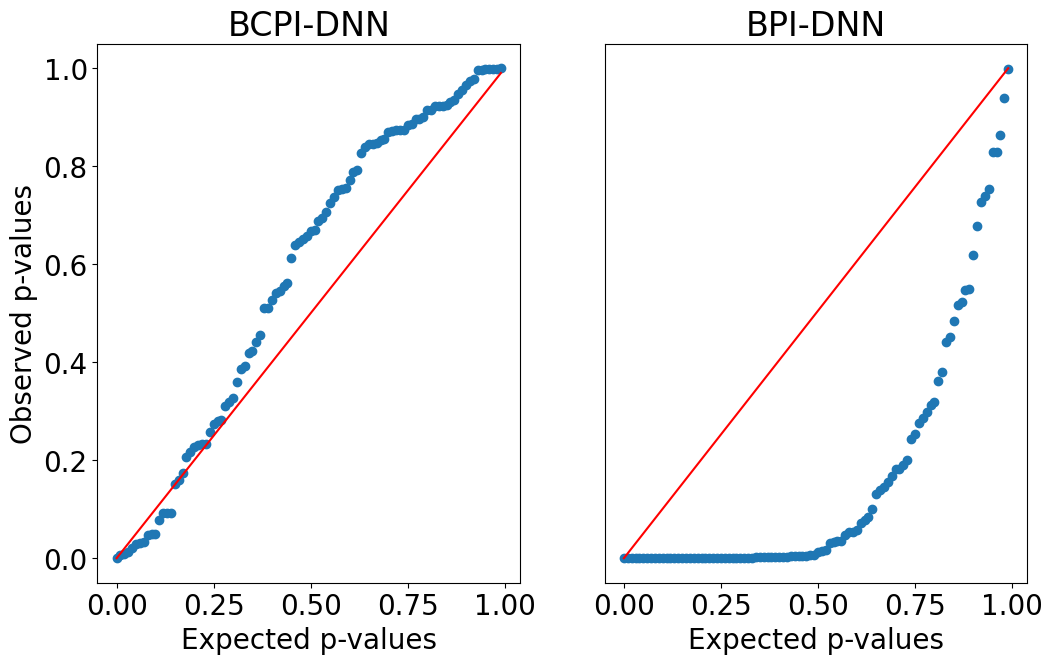

In [14]:
df_calib = pd.read_csv(res_path / "simulation_results_blocks_100_grps.csv")
df_calib = df_calib[(df_calib['method'].isin(['Permfit-DNN', 'CPI-DNN']) & (df_calib['correlation_group'] == 0.8)) & (df_calib['group_stack'] == True)].reset_index(drop=True)

list_non_sign = [f'G{i+1}' for i in range(6, 7)]
df_cpi = df_calib[df_calib['method'] == 'CPI-DNN']
df_cpi['variable']= np.array(np.tile([f'G{i+1}' for i in range(10)], 100))
df_cpi = df_cpi[df_cpi['variable'].isin(list_non_sign)]
df_cpi = df_cpi.drop(columns=['method', 'prob_data', 'variable'])

df_permfit = df_calib[df_calib['method'] == 'Permfit-DNN']
df_permfit['variable']= np.array(np.tile([f'G{i+1}' for i in range(10)], 100))
df_permfit = df_permfit[df_permfit['variable'].isin(list_non_sign)]
df_permfit = df_permfit.drop(columns=['method', 'prob_data', 'variable'])

sample_data_cpi = np.array(df_cpi.groupby(['iteration']).mean()['p_value'])
sample_data_permfit = np.array(df_permfit.groupby(['iteration']).mean()['p_value'])

plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = (12,7)
plt.title('A')
plt.subplot(1, 2, 1)
ordered_pvals_cpi = np.sort(sample_data_cpi)
expected_pvals_cpi = np.arange(0, 1, 1/len(sample_data_cpi))

plt.scatter(expected_pvals_cpi, ordered_pvals_cpi)
plt.plot(expected_pvals_cpi, expected_pvals_cpi, color='r')
plt.title('BCPI-DNN')
plt.xlabel("Expected p-values")
plt.ylabel("Observed p-values")

plt.subplot(1, 2, 2)
ordered_pvals_permfit = np.sort(sample_data_permfit)
expected_pvals_permfit = np.arange(0, 1, 1/len(sample_data_permfit))

plt.scatter(expected_pvals_permfit, ordered_pvals_permfit)
plt.plot(expected_pvals_permfit, expected_pvals_permfit, color='r')
plt.title('BPI-DNN')
plt.xlabel("Expected p-values")
plt.yticks([])
plt.show()

_____

# Compare Stacking vs Non Stacking

In [15]:
res_path = pathlib.Path('../results/results_csv')
list(res_path.glob('*groups*.csv'))

[PosixPath('../results/results_csv/AUC_blocks_100_groups_CPI_n_1000_p_1000_1::100_folds_2.csv'),
 PosixPath('../results/results_csv/type1error_blocks_100_groups_CPI_n_1000_p_1000_1::100_folds_2.csv'),
 PosixPath('../results/results_csv/power_blocks_100_groups_CPI_n_1000_p_1000_1::100_folds_2.csv'),
 PosixPath('../results/results_csv/time_bars_blocks_100_groups_CPI_n_1000_p_1000_1::100_folds_2.csv')]

In [16]:
df_auc = pd.read_csv(res_path / 'AUC_blocks_100_groups_CPI_n_1000_p_1000_1::100_folds_2.csv')
df_t1_error = pd.read_csv(res_path / 'type1error_blocks_100_groups_CPI_n_1000_p_1000_1::100_folds_2.csv')
df_power = pd.read_csv(res_path / 'power_blocks_100_groups_CPI_n_1000_p_1000_1::100_folds_2.csv')
df_time = pd.read_csv(res_path / 'time_bars_blocks_100_groups_CPI_n_1000_p_1000_1::100_folds_2.csv')

In [17]:
# AUC
df_auc_agg = df_auc.groupby(['method', 'group_stack'])['V1'].agg([np.mean, ymin, ymax]).reset_index()
# Type-I error
df_t1_error_agg = df_t1_error.groupby(['method', 'group_stack'])['V1'].agg([np.mean, ymin, ymax]).reset_index()
# Power
df_power_agg = df_power.groupby(['method', 'group_stack'])['V1'].agg([np.mean, ymin, ymax]).reset_index()

In [18]:
df_auc_agg['group_stack'] = df_auc_agg['group_stack'].map({False:'No Stacking', True:'Stacking'})
df_t1_error_agg['group_stack'] = df_t1_error_agg['group_stack'].map({False:'No Stacking', True:'Stacking'})
df_power_agg['group_stack'] = df_power_agg['group_stack'].map({False:'No Stacking', True:'Stacking'})
df_time['group_stack'] = df_time['group_stack'].map({False:'No Stacking', True:'Stacking'})

In [19]:
def plot_auc(data, offset=None, last=False):
    if last:
        tickSize = 10
    else:
        tickSize = 0

    points_a = alt.Chart(
        data
    ).mark_point(
        size=marker_size, opacity=1, fill='white'
    ).encode(
        y=alt.Y('group_stack:N',
                title=None,),
        x=alt.X('mean:Q',
                axis=alt.Axis(labels=last, tickSize=tickSize),
                title=None,
                scale=alt.Scale(domain=(0.4, 1.0))),
        color=alt.Color('group_stack:N',
                        title='Group Stacking'),
    ).properties(
        title='AUC score',
        height=height,
        width=width
    )

    error_a = alt.Chart(
        data
    ).mark_errorbar(
        size=err_size, opacity=1
    ).encode(
        y=alt.Y('group_stack:N',
                title=None,),
        x=alt.X('ymin:Q',
                axis=alt.Axis(labels=last, tickSize=tickSize),
                title='AUC',
                scale=alt.Scale(domain=(0.4, 1.0))),
        x2=alt.X2('ymax:Q', title='AUC'),
        color=alt.Color('group_stack:N', title='Group Stacking'),
        strokeWidth=alt.value(err_size)
    ).properties(
        height=height,
        width=width
    )


    rule2 = alt.Chart(pd.DataFrame({
      'V1': [0.5],
      'Problem Data': ['Type-I error nominal rate'],
      'color': ['black']
    })).mark_rule(size=1.5, color='black').encode(
      x='V1:Q'
    )

    fig_auc_1_all = (error_a + points_a + rule2)
    return fig_auc_1_all

# Type-I Error
def plot_typeI(data, offset=False, last=False):
    if last:
        tickSize = 10
    else:
        tickSize = 0
    points_c = alt.Chart(
        data
    ).mark_point(
        size=marker_size, opacity=1, fill='white'
    ).encode(
        y=alt.Y('group_stack:N',
            title=None, axis=alt.Axis(labels=last, title=None)),
        x=alt.X('mean:Q', 
                title=None,scale=alt.Scale(domain=(0, 1.0))),
        color=alt.Color('group_stack:N', title='Group Stacking'),
    ).properties(
        title='Type-I error',
        height=height,
        width=width
    )

    error_c = alt.Chart(
        data
    ).mark_errorbar(
        opacity=1
    ).encode(
        y=alt.Y('group_stack:N',
                title=None,
                axis=alt.Axis(labels=last, tickSize=tickSize),),
        x=alt.X('ymin:Q',
                title='Type-I error',
#                 axis=alt.Axis(labels=last, tickSize=tickSize),
                scale=alt.Scale(domain=(0, 1.0))),
        x2=alt.X2('ymax:Q',
                  title='Type-I error'),
        color=alt.Color('group_stack:N', title='Group Stacking'),
        strokeWidth=alt.value(err_size)
    ).properties(
        height=height,
        width=width
    )

    rule1= alt.Chart(pd.DataFrame({
      'V1': [0.05],
      'correlation_group': ['Type-I error nominal rate'],
      'color': ['black']
    })).mark_rule(size=1.5, color='black', strokeDash=[5, 5]).encode(
      x='V1:Q',
      color = alt.value('black')
    )

    fig_t1_all = (error_c + points_c + rule1)
    return fig_t1_all
# Power
def plot_power(data, offset=False, last=False):
    if last:
        tickSize = 10
    else:
        tickSize = 0
    points_a = alt.Chart(
        data
    ).mark_point(
        size=marker_size, opacity=1, fill='white'
    ).encode(
        y=alt.Y('group_stack:N',
                title=None,
                axis=alt.Axis(labels=last, tickSize=tickSize, title=None)
               ),
        x=alt.X('mean:Q', 
                title=None,
#                 axis=alt.Axis(labels=last, tickSize=tickSize),
                scale=alt.Scale(domain=(0, 1.0))),
        color=alt.Color('group_stack:N', title='Group Stacking'),
    ).properties(
        title='Power',
        height=height,
        width=width
    )

    error_a = alt.Chart(
        data
    ).mark_errorbar(
        opacity=1
    ).encode(
        y=alt.Y('group_stack:N',
                title=None,),
        x=alt.X('ymin:Q',
                title='Type-I error',
#                 axis=alt.Axis(labels=last, tickSize=tickSize),
                scale=alt.Scale(domain=(0, 1.0))),
        x2=alt.X2('ymax:Q', title='Type-I error'),
        color=alt.Color('group_stack:N', title='Group Stacking'),
        strokeWidth=alt.value(err_size)
    ).properties(
        height=height,
        width=width
    )

    fig_power_all = (error_a + points_a)
    return fig_power_all

def plot_time(data, last):
    if last:
        tickSize = 10
    else:
        tickSize = 0
    time_bars_1 = alt.Chart(
        df_time
    ).mark_point(size=marker_size, opacity=1, fill='white', color='black'
    ).encode(
        x=alt.Y('V1:Q',
                scale=alt.Scale(type="log"),
                title=None),
        y=alt.X('group_stack:N',
                title=None,
                axis=alt.Axis(labels=last, tickSize=tickSize, title=None)
               ),
#         color=alt.Color('group_stack:N', title='Group Stacking'),
    )
    time_bars_2 = alt.Chart(
        df_time
    ).mark_bar().encode(
        x=alt.Y('V1:Q',
                scale=alt.Scale(type="log"),
                title=None),
        y=alt.X('group_stack:N',
                title=None,
                axis=alt.Axis(labels=last, tickSize=tickSize, title=None)
               ),
        color=alt.Color('group_stack:N', title='Group Stacking'),
    )
    time_bars = (time_bars_2 + time_bars_1).properties(
        title='Time (seconds)',
        height=height,
        width=width
    )
    return time_bars

In [20]:
marker_size = 100
err_size = 2
height = 120
width= 160
scheme = 'tableau10'
p1 = plot_auc(df_auc_agg, last=True)
p2 = plot_typeI(df_t1_error_agg, last=False)
p3 = plot_power(df_power_agg, last=False)
p4 = plot_time(df_time, last=False)

my_font = 'Helvetica'
fig2 = alt.hconcat(
    p1,
    p2,
    p3,
    p4
).configure_axis(
    grid=True, 
    titleFont=my_font,
    titleFontWeight='normal',
    labelFont=my_font,
    labelFontSize=16,
    titleFontSize=20,
    labelSeparation=10
).configure_header(
    titleFont=my_font,
    titleFontWeight='normal',
    labelFont=my_font,
    titleFontSize=20,
    labelFontSize=16
).configure_view(
    strokeWidth=0
).configure_title(
    font=my_font,
    fontSize=20
).configure_legend(
    titleFontSize=20,
    labelFontSize=14,
#     orient ='top',
#     columns=3,
    labelLimit=0,
    titleLimit=0,
    columnPadding=40,
    orient='none',
    legendX=-125,
    legendY=-50
)

# fig2.save('figure_2_grps.svg')
fig2

alt.HConcatChart(...)

# Figure 3

In [21]:
res_path_fig3 = pathlib.Path('../results/results_csv')
list(res_path_fig3.glob("Result_*.csv"))

[PosixPath('../results/results_csv/Result_UKBB_age_all_imp_10_outer_2_inner_PERF.csv'),
 PosixPath('../results/results_csv/Result_UKBB_age_all_imp_10_outer_2_inner_SIGN.csv')]

In [22]:
scheme = 'pastel1'
color1 = '#637939'
color2 = '#1f77b4'
map_labls = {'lifestyle': 'Lifestyle',
             'brain_smri_plus': 'Brain SMRI',
             'brain_dmri_icvf': 'Brain DMRI ICVF',
             'brain_dmri_l1': 'Brain DMRI L1',
             'brain_dmri_l2': 'Brain DMRI L2',
             'brain_dmri_l3': 'Brain DMRI L3',
             'brain_dmri_od': 'Brain DMRI OD',
             'brain_dmri_fa': 'Brain DMRI FA',
             'brain_dmri_mo': 'Brain DMRI MO',
             'brain_dmri_md': 'Brain DMRI MD',
             'brain_dmri_isovf': 'Brain DMRI ISOVF',
             'education': 'Education',
             'connectivity': 'Connectivity (FMRI)',
             'earlylife': 'Early-Life',
             'mental_health':'Mental Health',
             'primary_demographics': 'Demographics'
            }

df_sign = pd.read_csv(res_path_fig3 / 'Result_UKBB_age_all_imp_10_outer_2_inner_SIGN.csv')

df_sign['variable'] = df_sign['variable'].map(map_labls)

df_sign = df_sign.sort_values(by=['p_value'])
list_grps = list(df_sign['variable'])

# df = df.drop(columns=['score', 'time', 'group_based', 'importance'])
df_sign['p_value'] = -np.log10(df_sign['p_value'] + 1e-10)

df_sign['p_value'][df_sign['p_value'] < 0] = 0

df_sign['Significant'] = df_sign['p_value'] >= -np.log10(0.001)

fig1 = alt.Chart(df_sign).mark_bar().encode(
y=alt.Y('p_value:Q', axis=alt.Axis(title='-log10(p-value)')),
x=alt.X('variable:N',
        axis=alt.Axis(labelAngle=-45,
                      labelColor=alt.condition('datum.value == \'Lifestyle\' || datum.value == \'Education\' || datum.value == \'Demographics\' || datum.value == \'Early-Life\' || datum.value == \'Mental Health\'',
                                               alt.value(color1),
                                               alt.value(color2))
                     ),
        sort=list_grps,
        title='Groups'),
color=alt.Color('Data Source:N', scale=alt.Scale(range=[color1, color2], domain=['Social', 'Brain'])),
).properties(
    title='Degree of Significance',
    width=750,
    height=160
)

fig = fig1

rule1 = alt.Chart(pd.DataFrame({
'V1': [-np.log10(0.001)],
})).mark_rule(size=1.5, strokeDash=[5, 5]).encode(
y=alt.Y('V1:Q', axis=alt.Axis(tickCount=5)),
color = alt.value('black')
)

text = alt.Chart().mark_text(
    text="P-value < 1e-3",
    dx=-20,
    dy=-10,
    fontSize=16
).encode(
        x=alt.datum('Demographics'),
        y=alt.datum(-np.log10(0.001))
)

fig_sign = fig + rule1 + text

df_perf = pd.read_csv(res_path_fig3 / 'Result_UKBB_age_all_imp_10_outer_2_inner_PERF.csv')

# MAE
df_perf_1 = df_perf[['p_val threshold', 'score_MAE']]
df_perf_1 = df_perf_1.assign(score_MAE=df_perf_1.score_MAE.str.split(",")).explode('score_MAE')

# R2
df_perf_2 = df_perf[['p_val threshold', 'score_R2']]
df_perf_2 = df_perf_2.assign(score_R2=df_perf_2.score_R2.str.split(",")).explode('score_R2')
df_perf_2 = df_perf_2[[col for col in df_perf_2.columns if col != 'p_val threshold']]

df_perf_n = pd.concat([df_perf_1, df_perf_2], axis=1).reset_index(drop=True)
df_perf_n['score_MAE']= df_perf_n['score_MAE'].str.replace('[', '')
df_perf_n['score_MAE']= df_perf_n['score_MAE'].str.replace(']', '')
df_perf_n['score_R2']= df_perf_n['score_R2'].str.replace('[', '')
df_perf_n['score_R2']= df_perf_n['score_R2'].str.replace(']', '')

df_perf_n[['score_MAE', 'score_R2']] = df_perf_n[['score_MAE', 'score_R2']].astype(float)

df_perf_n['p_val threshold'] = df_perf_n['p_val threshold'].map({1: '1', 0.001: '1e-3'})

# R2 scoreaa
perf_bars_R2 = alt.Chart(
    df_perf_n
).mark_boxplot(extent='min-max'
).encode(
    x=alt.Y('p_val threshold:N', title=None, axis=alt.Axis(labelAngle=0)),
    y=alt.X('score_R2:Q', title=None, scale=alt.Scale(domain=(0.7, 0.8))),
).properties(
    title='R2 score',
    height=160,
    width=160
)

# Breaking line
line = alt.Chart(pd.DataFrame({'x': [0]})).mark_rule(color='white', size=2).encode(
    x=alt.X('x:Q', title='Threshold', axis=alt.Axis(labels=False, tickSize=0)),
).properties(height=200, width=0.1)

# MAE score
perf_bars_MAE = alt.Chart(
    df_perf_n
).mark_boxplot(extent='min-max'
).encode(
    x=alt.Y('p_val threshold:N', title=None, axis=alt.Axis(labelAngle=0)),
    y=alt.X('score_MAE:Q', title=None, scale=alt.Scale(domain=(2.5, 3.0))),
).properties(
    title='MAE score',
    height=160,
    width=160
)

perf_bars = alt.hconcat(perf_bars_R2, line, perf_bars_MAE, spacing=-100)

final_fig = alt.hconcat(fig_sign, perf_bars)
# final_fig = final_fig.properties(legend=custom_legend)

my_font = 'Helvetica'
final_fig = final_fig.configure_axis(
    grid=True, 
    titleFont='Helvetica',
    titleFontWeight='normal',
    labelFont='Helvetica',
    labelFontSize=16,
    titleFontSize=20,
    labelLimit=0
).configure_legend(
    titleFontSize=16,
    labelFontSize=16,
    orient='left'
).configure_header(
    titleFont='Helvetica',
    titleFontWeight='normal',
    labelFont='Helvetica',
    titleFontSize=20,
    labelFontSize=16
).configure_title(
    font=my_font,
    fontSize=20
).configure_view(
    strokeWidth=0
)

# final_fig.save('figure_3_grps.svg')
final_fig

/tmp/ipykernel_6081/179779685.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sign['p_value'][df_sign['p_value'] < 0] = 0


alt.HConcatChart(...)